In [343]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Замеры на  M1 8-core

## Парсим данные

In [126]:
PATH_TO_RESULTS = "../results/M1_8_core/"

In [127]:
threads = (1, 4, 8)
blocks = tuple((2 ** i for i in range(2, 8)))
matrix_sizes = tuple((512 + i * 256 for i in range(0, 7)))

lu_names = sorted(("n" + str(thread) + "lu.txt" for thread in threads))

lu_block_names = sorted(("n" + str(thread) + "b" + str(block) + "lu_block.txt" for block in blocks for thread in threads))

lu_block_names_1 = lu_block_names[:len(blocks)]
lu_block_names_4 = lu_block_names[len(blocks):2 * len(blocks)]
lu_block_names_8 = lu_block_names[2 * len(blocks):3 * len(blocks)]

lu_block_names_tuple = (lu_block_names_1, lu_block_names_4, lu_block_names_8)

In [128]:
def get_content_from_file(filename: str):
    content = None
    with open(filename, "r") as file:
        content = file.read()
    return content

In [129]:
data = dict()

for lu_name in lu_names:
	data[f"LU_{lu_name[1]}"] = get_content_from_file(PATH_TO_RESULTS + lu_name).split()

for lu_names in lu_block_names_tuple:
	for lu_name in lu_names:
		data[f"LU_BLOCK_{lu_name[1]}_{lu_name[3:][:-12]}"] = get_content_from_file(PATH_TO_RESULTS + lu_name).split()

In [139]:
df = pd.DataFrame(data, index=matrix_sizes)
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,LU_1,LU_4,LU_8,LU_BLOCK_1_128,LU_BLOCK_1_16,LU_BLOCK_1_32,LU_BLOCK_1_4,LU_BLOCK_1_64,LU_BLOCK_1_8,LU_BLOCK_4_128,...,LU_BLOCK_4_32,LU_BLOCK_4_4,LU_BLOCK_4_64,LU_BLOCK_4_8,LU_BLOCK_8_128,LU_BLOCK_8_16,LU_BLOCK_8_32,LU_BLOCK_8_4,LU_BLOCK_8_64,LU_BLOCK_8_8
512,0.392406,0.144073,0.146666,0.359202,0.373690,0.355206,0.355091,0.364719,0.348274,0.176755,...,0.231350,0.166996,0.180594,0.195968,0.232999,0.232827,0.175925,0.192617,0.166052,0.191661
768,1.311624,0.551657,0.513153,1.485615,1.295317,1.202820,1.169106,1.285450,1.181873,0.566399,...,0.653658,0.696551,0.560991,0.631934,0.656782,0.564421,0.589019,0.701899,0.493270,0.571307
1024,3.104777,1.244529,0.993131,2.866652,2.992801,3.008976,2.867756,2.889934,2.740483,1.308702,...,1.325634,1.404665,1.288892,1.415444,1.206659,1.141504,1.083087,1.211172,0.992259,1.180195
1280,6.068110,2.350944,1.890782,5.491579,5.755680,6.025583,5.694717,5.521208,5.357769,2.351773,...,2.454844,2.827303,2.446787,2.509351,2.101020,2.003308,1.895576,2.398102,1.873376,2.111313
1536,10.508302,4.098229,3.249791,9.400884,10.018821,9.879896,9.426817,9.506563,9.290016,4.011199,...,4.138232,4.706991,4.165752,4.314589,4.085643,3.443607,3.178111,3.541565,3.139394,3.861333


In [159]:
df_boost = (df ** -1).mul(df["LU_1"], axis=0)
df_boost

,LU_1,LU_4,LU_8,LU_BLOCK_1_128,LU_BLOCK_1_16,LU_BLOCK_1_32,LU_BLOCK_1_4,LU_BLOCK_1_64,LU_BLOCK_1_8,LU_BLOCK_4_128,...,LU_BLOCK_4_32,LU_BLOCK_4_4,LU_BLOCK_4_64,LU_BLOCK_4_8,LU_BLOCK_8_128,LU_BLOCK_8_16,LU_BLOCK_8_32,LU_BLOCK_8_4,LU_BLOCK_8_64,LU_BLOCK_8_8
512,1.0,2.723661,2.675508,1.092438,1.050084,1.104728,1.105086,1.075913,1.126716,2.220056,...,1.696157,2.349793,2.172863,2.002398,1.684153,1.685397,2.230530,2.037235,2.363151,2.047396
768,1.0,2.377608,2.556010,0.882883,1.012589,1.090457,1.121903,1.020362,1.109784,2.315724,...,2.006591,1.883027,2.338048,2.075571,1.997046,2.323840,2.226794,1.868679,2.659039,2.295830
1024,1.0,2.494741,3.126251,1.083067,1.037415,1.031838,1.082650,1.074342,1.132931,2.372409,...,2.342107,2.210333,2.408873,2.193500,2.573036,2.719900,2.866600,2.563448,3.128999,2.630732
1280,1.0,2.581138,3.209312,1.104985,1.054282,1.007058,1.065568,1.099055,1.132581,2.580228,...,2.471892,2.146254,2.480032,2.418199,2.888173,3.029045,3.201196,2.530380,3.239131,2.874093
1536,1.0,2.564108,3.233532,1.117799,1.048856,1.063605,1.114724,1.105373,1.131139,2.619741,...,2.539322,2.232488,2.522546,2.435528,2.572007,3.051539,3.306462,2.967135,3.347239,2.721418
1792,1.0,2.521144,3.206319,1.112669,1.046184,1.102430,1.091580,1.076912,1.138465,2.610371,...,2.527258,2.350157,2.635999,2.496647,2.762158,3.220060,3.349108,2.925574,3.588943,3.131928
2048,1.0,2.461297,3.330256,1.110443,1.010297,1.109532,1.135584,1.121273,1.121147,2.612538,...,2.602304,2.398245,2.643797,2.529107,2.834905,3.332414,3.573912,3.149234,3.713483,3.327843


## Анализ

Сначала построим графики зависимости ускорения от метода, количества ядер и блоков.

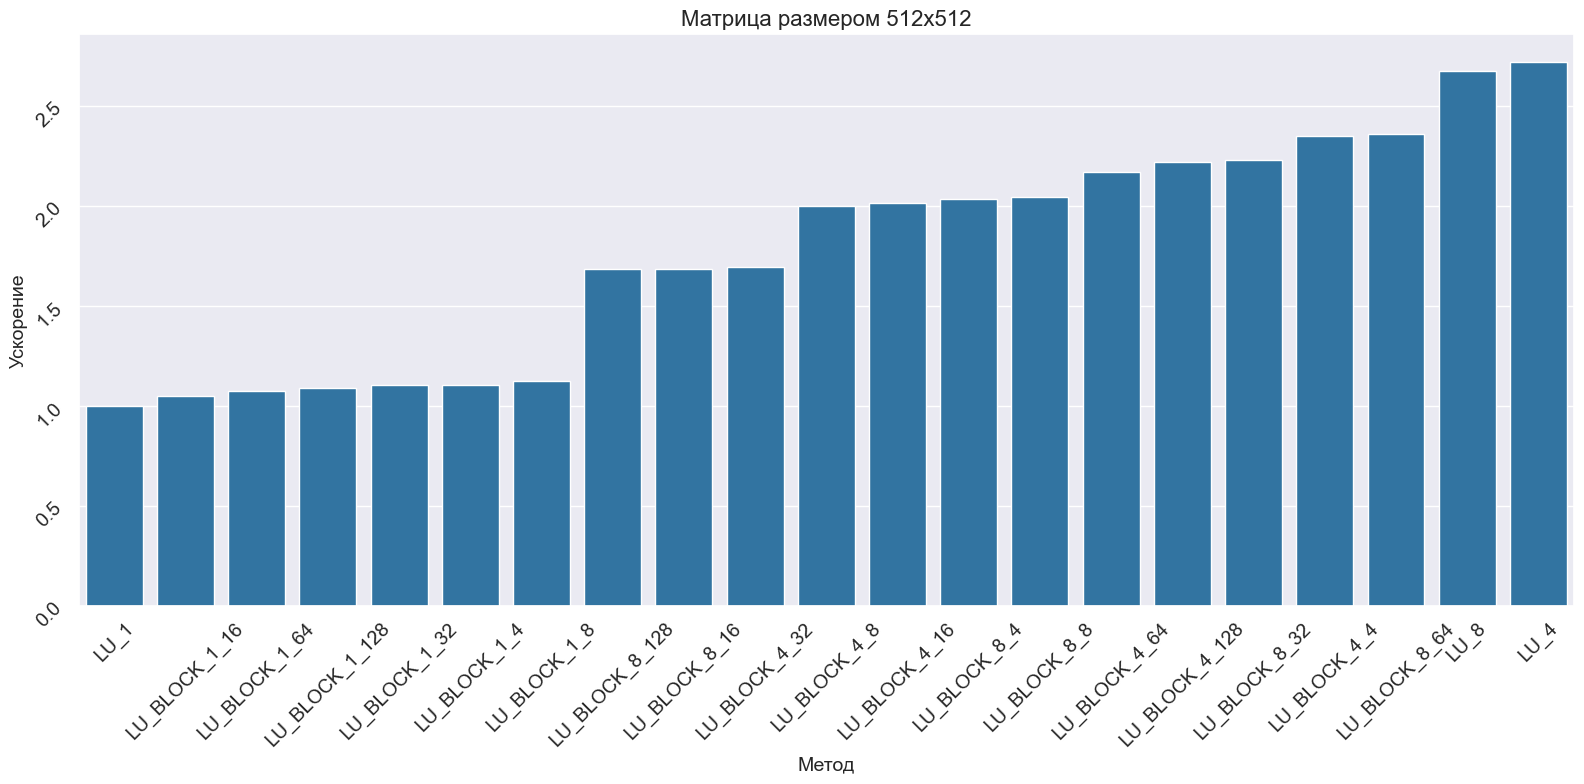

In [258]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(df_boost.iloc[0].sort_values())
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.title("Матрица размером 512х512", fontsize=16)
plt.xlabel("Метод", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.tight_layout()
sns.set_context("notebook")

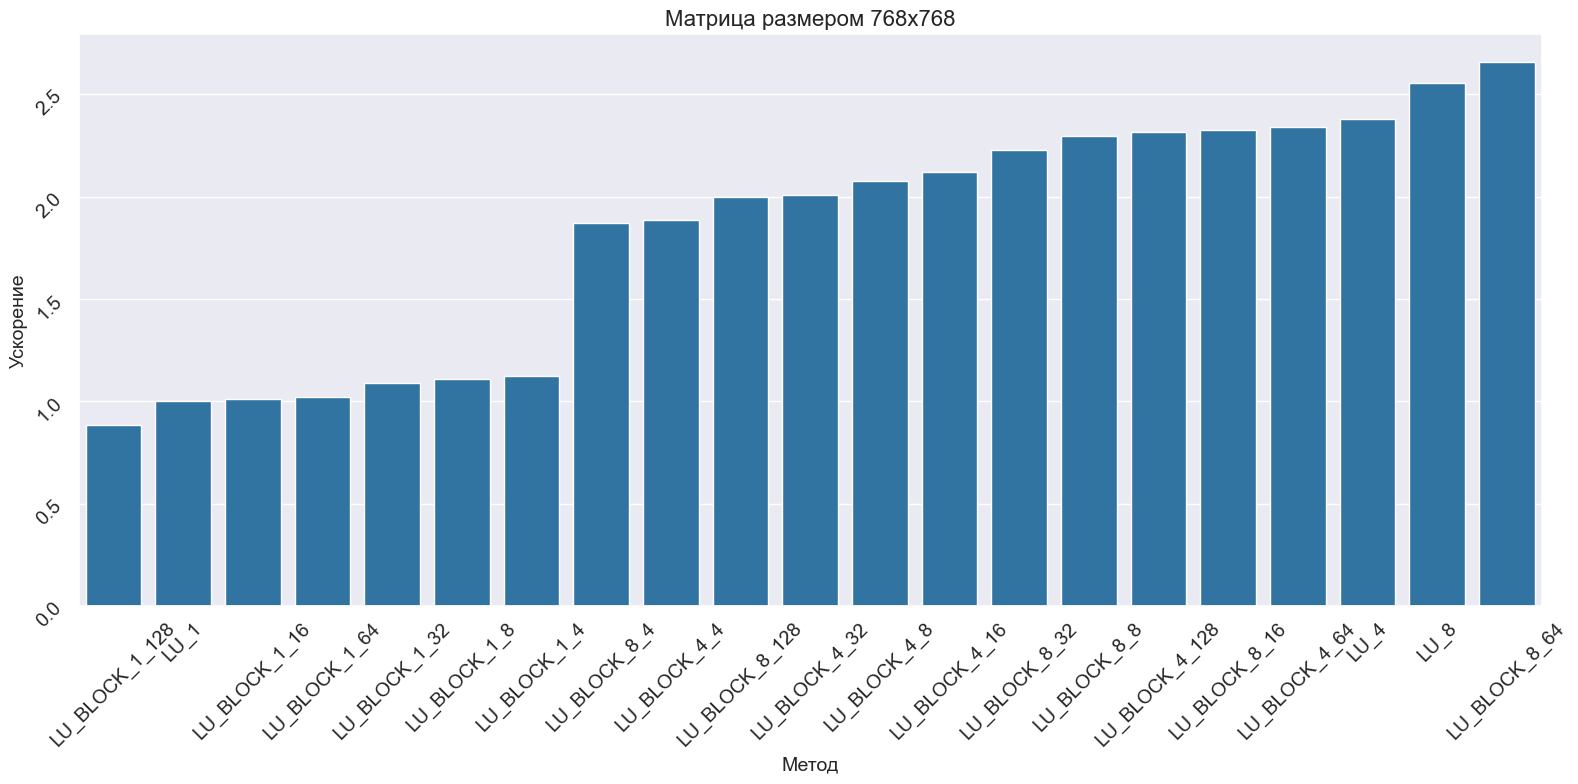

In [259]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(df_boost.iloc[1].sort_values())
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.title("Матрица размером 768х768", fontsize=16)
plt.xlabel("Метод", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.tight_layout()
sns.set_context("notebook")

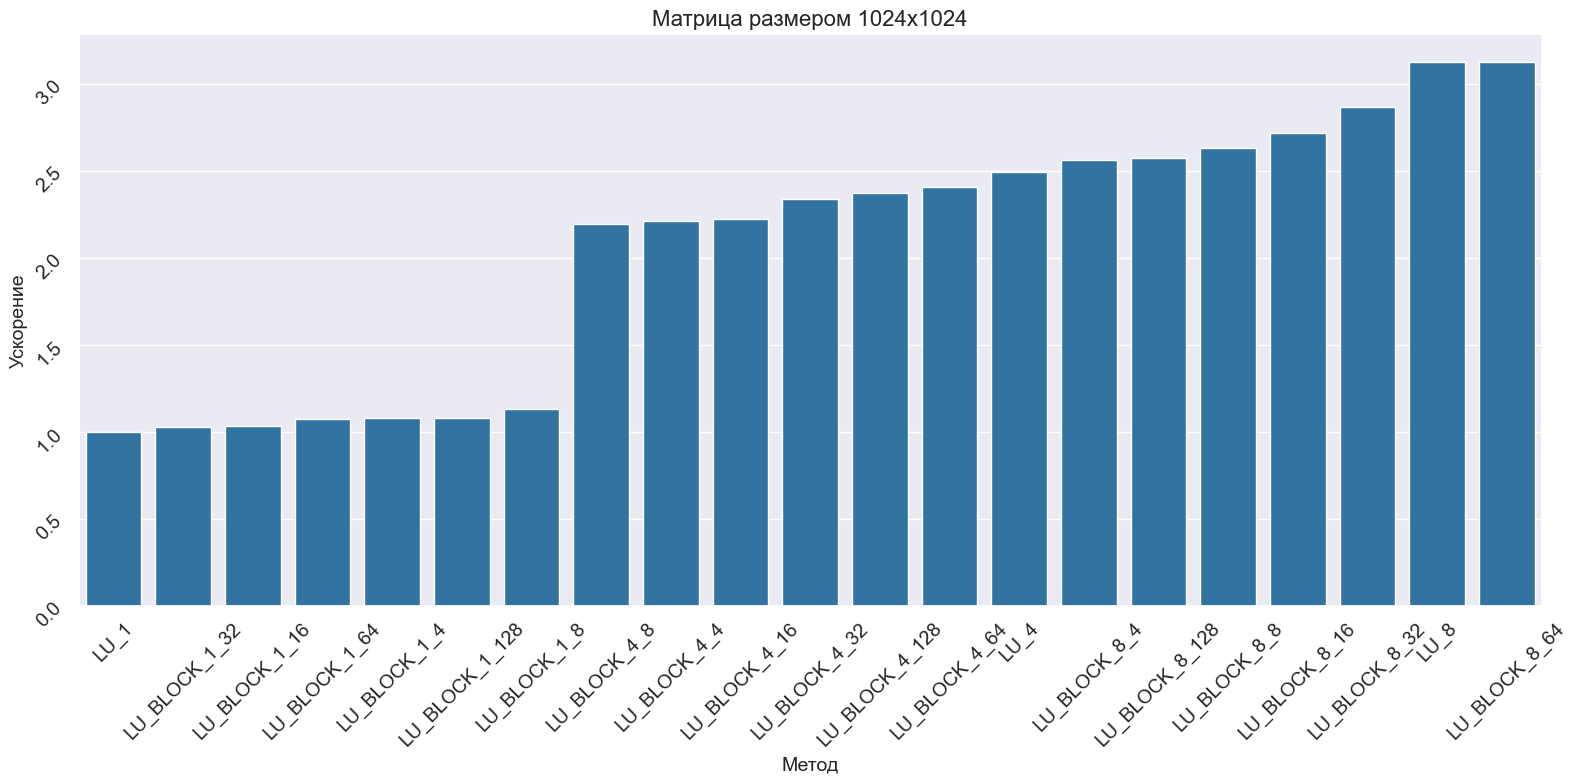

In [260]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(df_boost.iloc[2].sort_values())
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.title("Матрица размером 1024х1024", fontsize=16)
plt.xlabel("Метод", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.tight_layout()
sns.set_context("notebook")

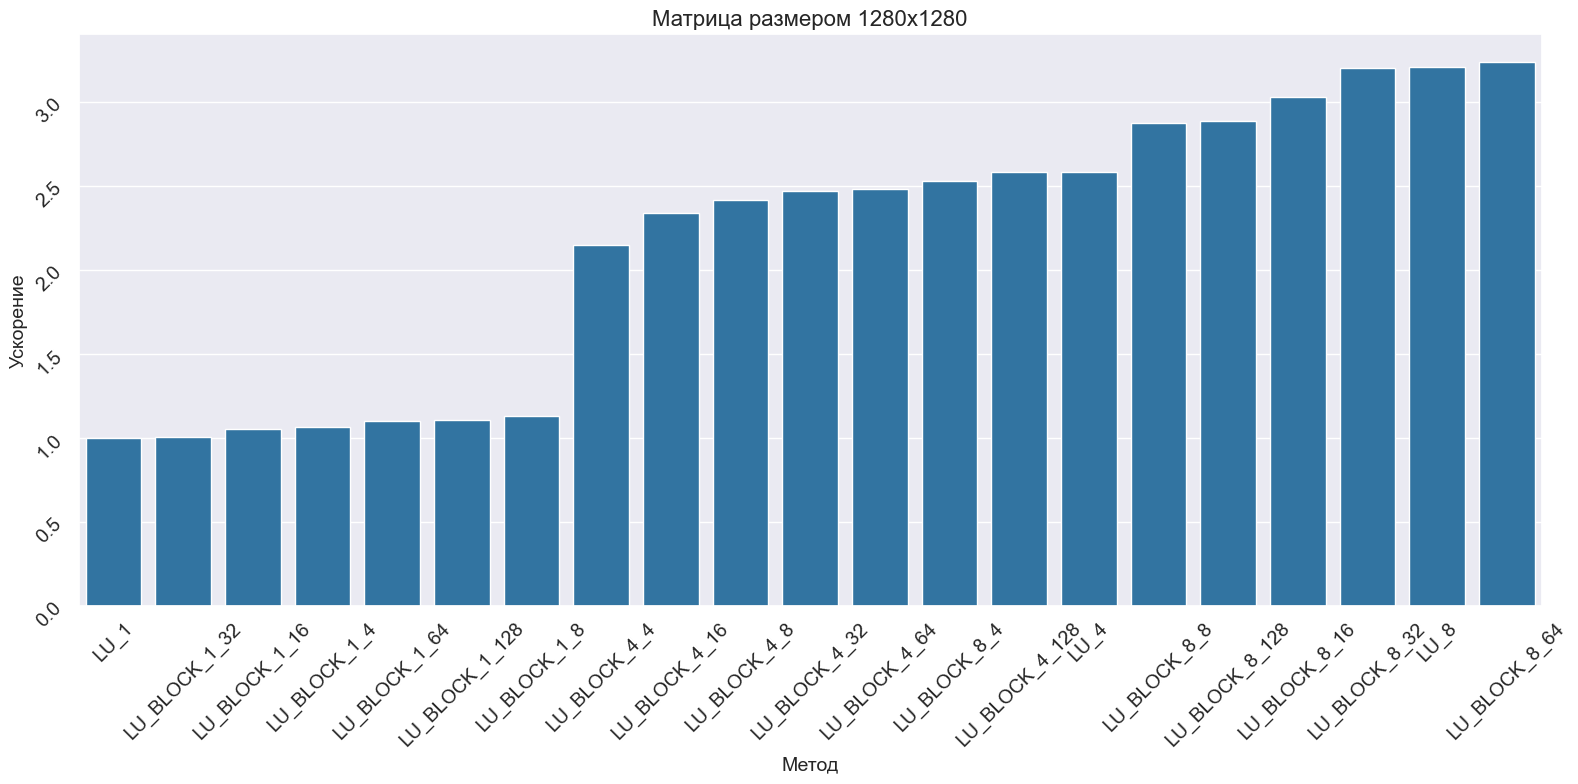

In [261]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(df_boost.iloc[3].sort_values())
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.title("Матрица размером 1280х1280", fontsize=16)
plt.xlabel("Метод", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.tight_layout()
sns.set_context("notebook")

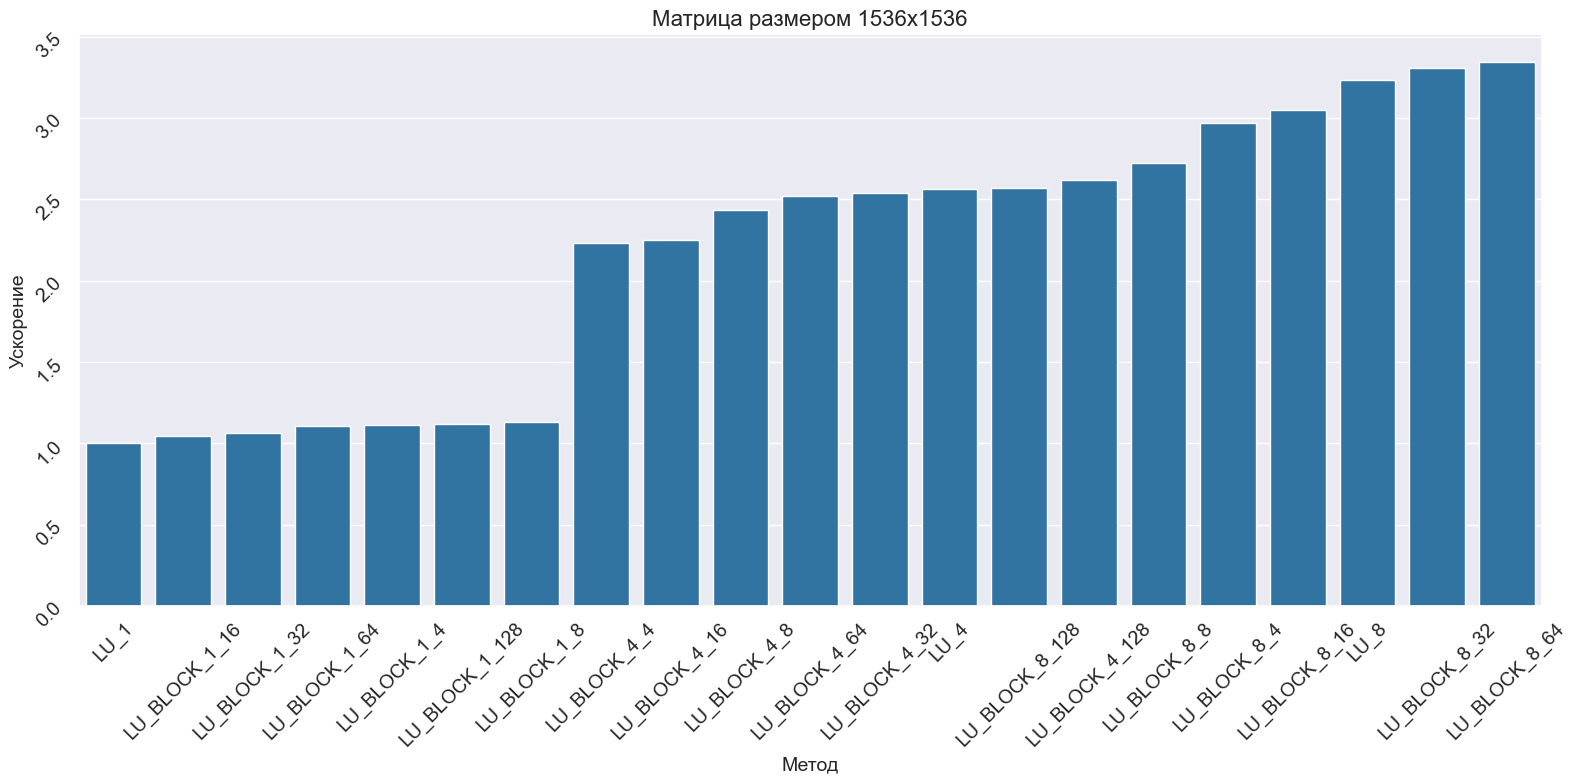

In [262]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(df_boost.iloc[4].sort_values())
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.title("Матрица размером 1536х1536", fontsize=16)
plt.xlabel("Метод", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.tight_layout()
sns.set_context("notebook")

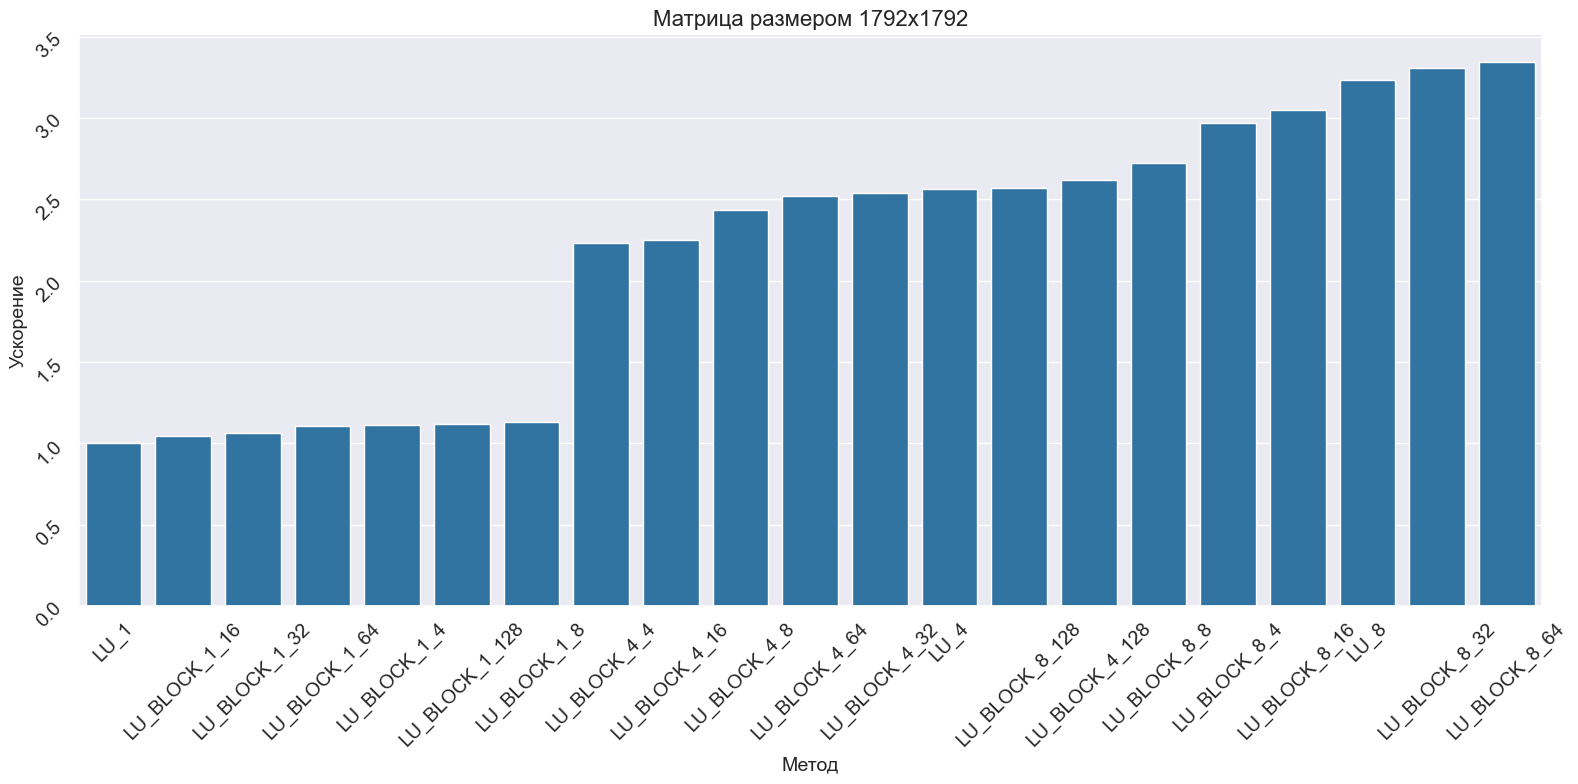

In [263]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(df_boost.iloc[4].sort_values())
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.title("Матрица размером 1792х1792", fontsize=16)
plt.xlabel("Метод", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.tight_layout()
sns.set_context("notebook")

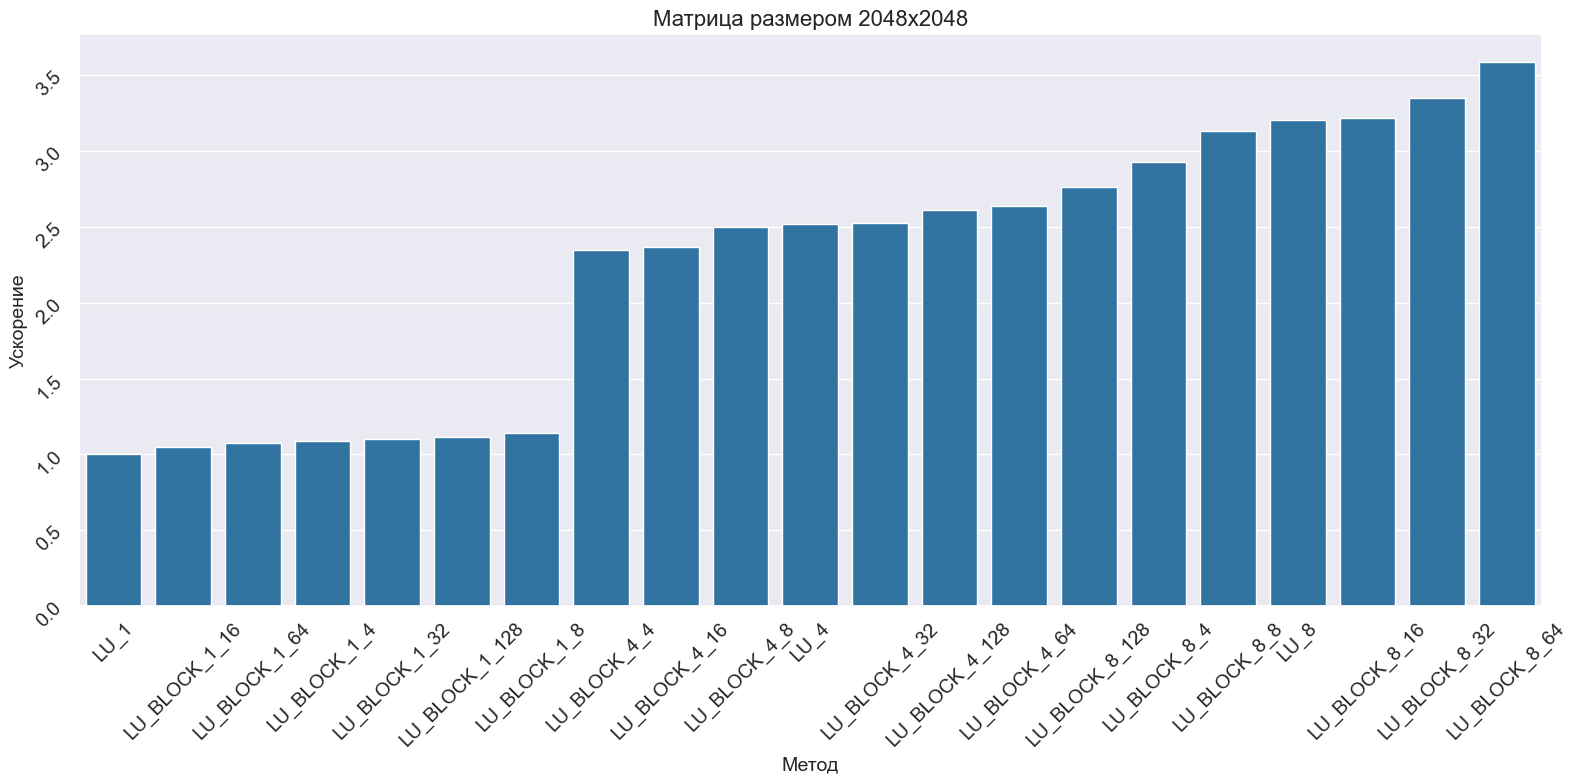

In [264]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid")
sns.barplot(df_boost.iloc[5].sort_values())
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.title("Матрица размером 2048х2048", fontsize=16)
plt.xlabel("Метод", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.tight_layout()
sns.set_context("notebook")

In [284]:
max_columns = df_boost.idxmax(axis=1)

# Получаем максимальные значения для каждой строки
max_values = df_boost.max(axis=1)

# Создаем DataFrame с именами столбцов и соответствующими значениями
result = pd.DataFrame({'Max Column': max_columns, 'Max Value': max_values})
print(result)
print(f"Среднее для LU 8 64: {result["Max Value"][1::].mean()}")

         Max Column  Max Value
512            LU_4   2.723661
768   LU_BLOCK_8_64   2.659039
1024  LU_BLOCK_8_64   3.128999
1280  LU_BLOCK_8_64   3.239131
1536  LU_BLOCK_8_64   3.347239
1792  LU_BLOCK_8_64   3.588943
2048  LU_BLOCK_8_64   3.713483
Среднее для LU 8 64: 3.2794722533988874


Вывод: в большинстве случаев у блочного алгоритма с размером блока в 64 элемента оказалось самое большое ускорение (в среднем ~3.28 раза).

/var/folders/rt/05xkt1vd50z9skjht7f_j4740000gn/T/ipykernel_95033/711183316.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]


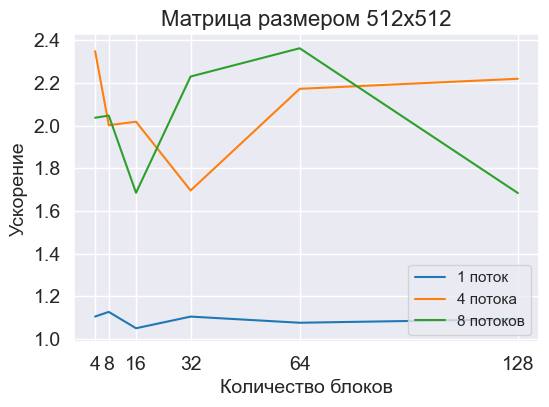

In [366]:
lu1 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_1")]].iloc[0]
lu4 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_4")]].iloc[0]
lu8 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_8")]].iloc[0]
data = dict()

for i in range(len(lu1)):
	data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]

df_plt = pd.DataFrame(data, index=("1 поток", "4 потока", "8 потоков"))

plt.figure(figsize=(6, 4))
sns.lineplot(df_plt.iloc[0], label="1 поток")
sns.lineplot(df_plt.iloc[1], label="4 потока")
sns.lineplot(df_plt.iloc[2], label="8 потоков")
plt.xlabel("Количество блоков", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.xticks(df_plt.columns, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.title("Матрица размером 512х512", fontsize=16)
plt.show()


/var/folders/rt/05xkt1vd50z9skjht7f_j4740000gn/T/ipykernel_95033/3459410663.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]


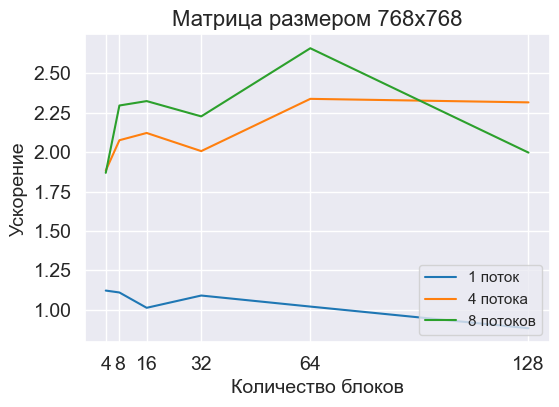

In [367]:
lu1 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_1")]].iloc[1]
lu4 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_4")]].iloc[1]
lu8 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_8")]].iloc[1]
data = dict()

for i in range(len(lu1)):
	data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]

df_plt = pd.DataFrame(data, index=("1 поток", "4 потока", "8 потоков"))

plt.figure(figsize=(6, 4))
sns.lineplot(df_plt.iloc[0], label="1 поток")
sns.lineplot(df_plt.iloc[1], label="4 потока")
sns.lineplot(df_plt.iloc[2], label="8 потоков")
plt.xlabel("Количество блоков", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.xticks(df_plt.columns, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.title("Матрица размером 768х768", fontsize=16)
plt.show()


/var/folders/rt/05xkt1vd50z9skjht7f_j4740000gn/T/ipykernel_95033/3112218270.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]


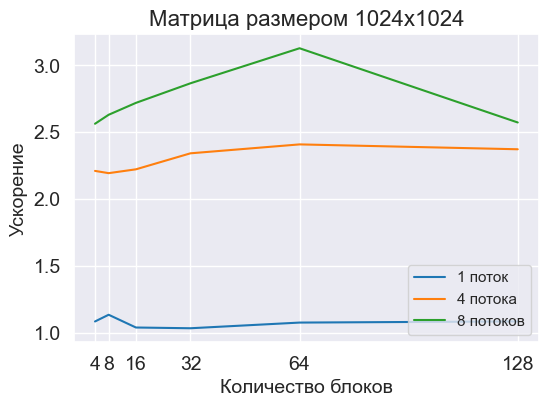

In [368]:
lu1 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_1")]].iloc[2]
lu4 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_4")]].iloc[2]
lu8 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_8")]].iloc[2]
data = dict()

for i in range(len(lu1)):
	data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]

df_plt = pd.DataFrame(data, index=("1 поток", "4 потока", "8 потоков"))

plt.figure(figsize=(6, 4))
sns.lineplot(df_plt.iloc[0], label="1 поток")
sns.lineplot(df_plt.iloc[1], label="4 потока")
sns.lineplot(df_plt.iloc[2], label="8 потоков")
plt.xlabel("Количество блоков", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.xticks(df_plt.columns, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.title("Матрица размером 1024х1024", fontsize=16)
plt.show()


/var/folders/rt/05xkt1vd50z9skjht7f_j4740000gn/T/ipykernel_95033/2992477611.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]


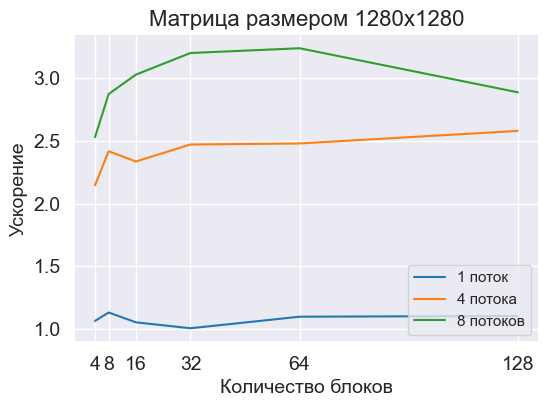

In [369]:
lu1 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_1")]].iloc[3]
lu4 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_4")]].iloc[3]
lu8 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_8")]].iloc[3]
data = dict()

for i in range(len(lu1)):
	data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]

df_plt = pd.DataFrame(data, index=("1 поток", "4 потока", "8 потоков"))

plt.figure(figsize=(6, 4))
sns.lineplot(df_plt.iloc[0], label="1 поток")
sns.lineplot(df_plt.iloc[1], label="4 потока")
sns.lineplot(df_plt.iloc[2], label="8 потоков")
plt.xlabel("Количество блоков", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.xticks(df_plt.columns, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.title("Матрица размером 1280x1280", fontsize=16)
plt.show()


/var/folders/rt/05xkt1vd50z9skjht7f_j4740000gn/T/ipykernel_95033/3240721040.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]


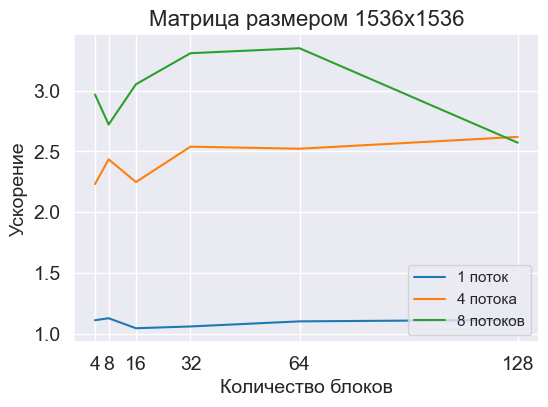

In [370]:
lu1 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_1")]].iloc[4]
lu4 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_4")]].iloc[4]
lu8 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_8")]].iloc[4]
data = dict()

for i in range(len(lu1)):
	data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]

df_plt = pd.DataFrame(data, index=("1 поток", "4 потока", "8 потоков"))

plt.figure(figsize=(6, 4))
sns.lineplot(df_plt.iloc[0], label="1 поток")
sns.lineplot(df_plt.iloc[1], label="4 потока")
sns.lineplot(df_plt.iloc[2], label="8 потоков")
plt.xlabel("Количество блоков", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.xticks(df_plt.columns, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.title("Матрица размером 1536х1536", fontsize=16)
plt.show()


/var/folders/rt/05xkt1vd50z9skjht7f_j4740000gn/T/ipykernel_95033/935332080.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]


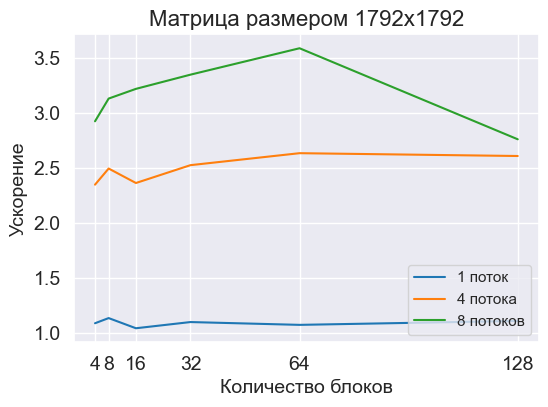

In [371]:
lu1 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_1")]].iloc[5]
lu4 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_4")]].iloc[5]
lu8 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_8")]].iloc[5]
data = dict()

for i in range(len(lu1)):
	data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]

df_plt = pd.DataFrame(data, index=("1 поток", "4 потока", "8 потоков"))

plt.figure(figsize=(6, 4))
sns.lineplot(df_plt.iloc[0], label="1 поток")
sns.lineplot(df_plt.iloc[1], label="4 потока")
sns.lineplot(df_plt.iloc[2], label="8 потоков")
plt.xlabel("Количество блоков", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.xticks(df_plt.columns, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.title("Матрица размером 1792х1792", fontsize=16)
plt.show()


/var/folders/rt/05xkt1vd50z9skjht7f_j4740000gn/T/ipykernel_95033/2356201300.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]


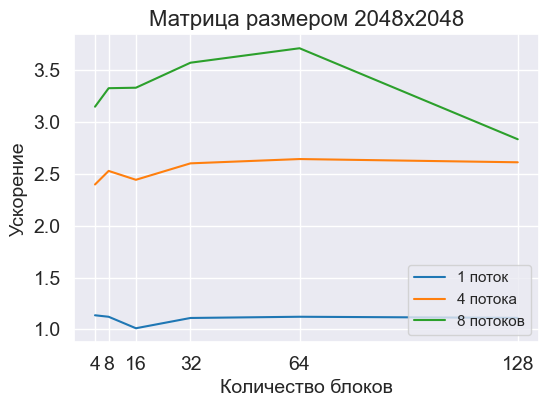

In [372]:
lu1 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_1")]].iloc[6]
lu4 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_4")]].iloc[6]
lu8 = df_boost[[column for column in df_boost.columns if column.startswith("LU_BLOCK_8")]].iloc[6]
data = dict()

for i in range(len(lu1)):
	data[int(lu1.index[i][11:])] = [lu1[i], lu4[i], lu8[i]]

df_plt = pd.DataFrame(data, index=("1 поток", "4 потока", "8 потоков"))

plt.figure(figsize=(6, 4))
sns.lineplot(df_plt.iloc[0], label="1 поток")
sns.lineplot(df_plt.iloc[1], label="4 потока")
sns.lineplot(df_plt.iloc[2], label="8 потоков")
plt.xlabel("Количество блоков", fontsize=14)
plt.ylabel("Ускорение", fontsize=14)
plt.xticks(df_plt.columns, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right')
plt.title("Матрица размером 2048х2048", fontsize=16)
plt.show()


Вывод: не всегда хорошо увеличивать кол-во блоков в блочном методе, на наших тестах лучшее ускорение получилось на 64 блоках.